# Influnece of method


In [84]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.style
plt.style.use('fivethirtyeight')
import tikzplotlib

## Daten Einlesen


In [85]:
dfref1   = pd.read_excel('data/EigeneDaten/Ref1.xlsx')  
dfref25  = pd.read_excel('data/EigeneDaten/Ref25.xlsx')
dfref50  = pd.read_excel('data/EigeneDaten/Ref50.xlsx')
dfref100 = pd.read_excel('data/EigeneDaten/Ref100.xlsx')
dfref200 = pd.read_excel('data/EigeneDaten/Ref200.xlsx')
dfref250 = pd.read_excel('data/EigeneDaten/Ref250.xlsx')
dfref300 = pd.read_excel('data/EigeneDaten/Ref300.xlsx')



dftrans1   = pd.read_excel('data/EigeneDaten/Trans1.xlsx')  
dftrans25  = pd.read_excel('data/EigeneDaten/Trans25.xlsx')
dftrans50  = pd.read_excel('data/EigeneDaten/Trans50.xlsx')
dftrans100 = pd.read_excel('data/EigeneDaten/Trans100.xlsx')
dftrans200 = pd.read_excel('data/EigeneDaten/Trans200.xlsx')
dftrans250 = pd.read_excel('data/EigeneDaten/Trans250.xlsx')
dftrans300 = pd.read_excel('data/EigeneDaten/Trans300.xlsx')

print(dfref1)
# dfspec_ref500rpm = pd.read_csv('data/messmethode/Reflektion/500rpm_refl_1.xy', delimiter=',', header = None, names=['nm', 'ref'])
# dfspec_ref2000rpm = pd.read_csv('data/messmethode/Reflektion/2000rpm_refl_1.xy', delimiter=',', header = None, names=['nm', 'ref'])
# dfspec_ref5000rpm = pd.read_csv('data/messmethode/Reflektion/5000rpm_refl_1.xy', delimiter=',', header = None, names=['nm', 'ref'])
# dfspec_trans500rpm = pd.read_csv('data/messmethode/Transmission/500rpm_trans_1.xy', delimiter=',', header = None, names=['nm', 'ref'])
# dfspec_trans2000rpm = pd.read_csv('data/messmethode/Transmission/2000rpm_trans_1.xy', delimiter=',', header = None, names=['nm', 'ref'])
# dfspec_trans5000rpm = pd.read_csv('data/messmethode/Transmission/5000rpm_trans_1.xy', delimiter=',', header = None, names=['nm', 'ref'])

   c/ g/l  d/nm         f
0       1     0  0.004296
1       1     0  0.003691
2       1     0  0.004336
3       1     0  0.004798
4       1     0  0.004772
5       1     0  0.003948


## Funktionen


In [86]:
def mittelwert(df):
    if np.std(df.loc[:,'d/nm']) > 0:
        return np.array([np.mean(df.loc[:,'d/nm']), np.std(df.loc[:,'d/nm']), np.mean(df.loc[:,'d/nm'])/ np.std(df.loc[:,'d/nm']), np.mean(df.loc[:,'f']), np.std(df.loc[:,'d/nm'])/np.mean(df.loc[:,'f'])])
    else:
        print('Es gint 0 Werte!')
        return np.array([np.mean(df.loc[:,'d/nm']), np.std(df.loc[:,'d/nm']), np.mean(df.loc[:,'d/nm'])/ np.std(df.loc[:,'f']), np.mean(df.loc[:,'f']), np.std(df.loc[:,'d/nm'])/np.mean(df.loc[:,'f'])])


# def mittelwert(df):
#     return np.array([np.mean(df.loc[:,'d/nm']), np.std(df.loc[:,'d/nm']), np.mean(df.loc[:,'d/nm'])/ np.std(df.loc[:,'d/nm']), np.mean(df.loc[:,'f']), np.std(df.loc[:,'d/nm'])/np.mean(df.loc[:,'f'])])



In [87]:
heterogeneity_ref = mittelwert(dfref1)
for i in [dfref25  ,dfref50  ,dfref100 ,dfref200 ,dfref250 ,dfref300 ]:
    heterogeneity_ref = np.vstack((heterogeneity_ref, mittelwert(i)))

heterogeneity_trans = mittelwert(dftrans1)
for i in [dftrans25 ,dftrans50 ,dftrans100,dftrans200,dftrans250,dftrans300]:
    heterogeneity_trans = np.vstack((heterogeneity_trans, mittelwert(i)))

print(heterogeneity_ref)

Es gint 0 Werte!
Es gint 0 Werte!
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 4.30683333e-03
  0.00000000e+00]
 [5.48000000e+01 5.32290647e-01 1.02951273e+02 1.69850000e-03
  3.13388665e+02]
 [1.84333333e+02 7.08676388e-01 2.60109320e+02 5.07200000e-03
  1.39723263e+02]
 [5.06916667e+02 1.11512954e+01 4.54580969e+01 1.46605000e-02
  7.60635407e+02]
 [1.60861667e+03 6.96668660e+00 2.30901253e+02 1.09588333e-02
  6.35714258e+02]
 [2.39020000e+03 2.58823621e+01 9.23486038e+01 1.52886667e-02
  1.69291166e+03]
 [3.60360000e+03 8.91463030e+01 4.04234374e+01 3.71438333e-02
  2.40002969e+03]]


In [88]:
heterogeneity_ref = np.hstack((np.array([[1,25,50,100,200,250,300]]).T, heterogeneity_ref))
heterogeneity_trans = np.hstack((np.array([[1,25,50,100,200,250,300]]).T, heterogeneity_trans))

## Plot Heterogenity


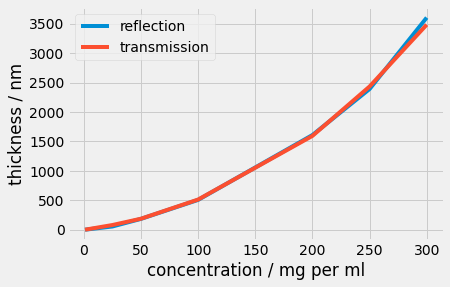

In [89]:
plt.plot(heterogeneity_ref[:,0],heterogeneity_ref[:,1], label  = 'reflection')
plt.plot(heterogeneity_trans[:,0],heterogeneity_trans[:,1], label = 'transmission')

plt.xlabel('concentration / mg per ml')
plt.ylabel('thickness / nm')
plt.legend()
# tikzplotlib.save("VglMethConcThick.tex")

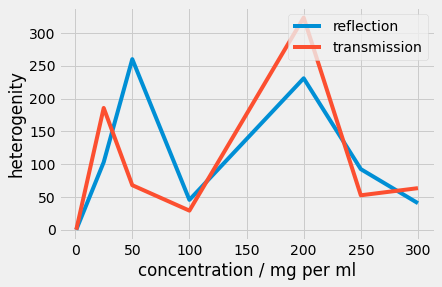

In [90]:
plt.plot(heterogeneity_ref[:,0],heterogeneity_ref[:,3], label  = 'reflection')
plt.plot(heterogeneity_trans[:,0],heterogeneity_trans[:,3], label = 'transmission')

plt.xlabel('concentration / mg per ml')
plt.ylabel('heterogenity')

plt.legend()

tikzplotlib.save("VglMethConcHeter.tex")


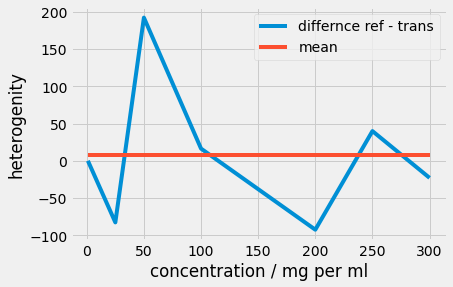

In [91]:
plt.plot(heterogeneity_ref[:,0],heterogeneity_ref[:,3]- heterogeneity_trans[:,3], label  = 'differnce ref - trans')
plt.plot(heterogeneity_ref[:,0],np.ones(heterogeneity_ref[:,0].size) *np.mean(heterogeneity_ref[:,3]- heterogeneity_trans[:,3]), label  = 'mean')

plt.xlabel('concentration / mg per ml')
plt.ylabel('heterogenity')

plt.legend()
# tikzplotlib.save("VglMethConcHeterDiff.tex")

## Plots Spectra

### Reflection

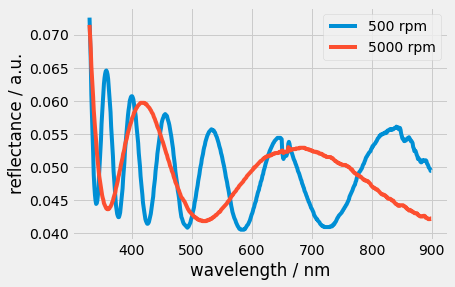

In [92]:
plt.plot(dfspec_ref500rpm.loc[:,'nm'], dfspec_ref500rpm.loc[:,'ref'], label  = '500 rpm')
#plt.plot(dfspec_ref2000rpm.loc[:,'nm'], dfspec_ref2000rpm.loc[:,'ref'], label  = '2000 rpm')
plt.plot(dfspec_ref5000rpm.loc[:,'nm'], dfspec_ref5000rpm.loc[:,'ref'], label  = '5000 rpm')

plt.xlabel('wavelength / nm')
plt.ylabel('reflectance / a.u.')
plt.legend()

#tikzplotlib.save("VglMessmeth_refl_500adn5000.tex")

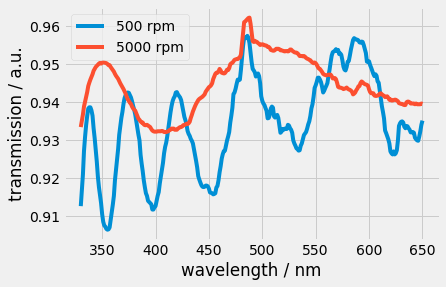

In [93]:
plt.plot(dfspec_trans500rpm.loc[:,'nm'], dfspec_trans500rpm.loc[:,'ref'], label  = '500 rpm')
#plt.plot(dfspec_ref2000rpm.loc[:,'nm'], dfspec_ref2000rpm.loc[:,'ref'], label  = '2000 rpm')
plt.plot(dfspec_trans5000rpm.loc[:,'nm'], dfspec_trans5000rpm.loc[:,'ref'], label  = '5000 rpm')

plt.xlabel('wavelength / nm')
plt.ylabel('transmission / a.u.')
plt.legend()
#tikzplotlib.save("VglMessmeth_trans_500adn5000.tex")

## Exportieren to Latex

In [94]:
dfDataRef = pd.DataFrame(heterogeneity_ref, columns= ['rot. speed', 'thickness / nm', 'std / nm', 'thickness/std / a.u.', 'error fit / nm', 'std/error fit / a.u.']).round(2)
dfDataTrans = pd.DataFrame(heterogeneity_trans, columns= ['rot. speed', 'thickness / nm', 'std / nm', 'thickness/std / a.u.', 'error fit / nm', 'std/error fit / a.u.']).round(2)
dfDataTrans.to_latex('VglMethodConcTableRef.tex')
dfDataTrans.to_latex('VglMethodConcTableTrans.tex')

C:\Users\leonh\AppData\Local\Temp\ipykernel_13956\2706575006.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  dfDataTrans.to_latex('VglMethodConcTableRef.tex')
C:\Users\leonh\AppData\Local\Temp\ipykernel_13956\2706575006.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  dfDataTrans.to_latex('VglMethodConcTableTrans.tex')
